In [48]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import copy
import torch
from synthetic_env import synthetic_env
from naive_agents import DoNothing, FixedPhi
from scipy.optimize import curve_fit
#from dynamic_phi_agent import DynamicPhiAgent
#from dynamic_phi_agent_mean_only import DynamicPhiAgentMeanOnly
#from dynamic_phi_agent_mean_plus_var import DynamicPhiAgent

In [39]:
class expected_baseline:
"""
TODO

identify all needed params to pass in
eval A(t)
eval B(t)

Wait now need to pass in both seperation and time?
-actually just time remaining is what matters

return A(t)r^2+B(t) 
"""
    
    def __init__(self, PHI,D,r_d,scaling=0.5, nu = .025):
        self.phi = PHI
        self.D = D
        self.r_d = r_d
        self.scaling = scaling
        self.beta = 1.
        self.nu = nu
        self.cramer_d2 = 1/D
        self.a = self.D + 1/self.cramer_d2




    def evaluate_prescribed(self, seperation):
        #b = self.b
        first_term = (seperation**2/self.D)*np.log(seperation/self.r_d)
        second_term = (self.r_d**2*(self.phi-self.D))/(self.nu*(self.phi-self.a))
        return (self.phi**2 + self.beta) * (first_term + second_term)

In [65]:
def compare_return_to_baseline(phi_val, baseline, sep_size=0.2*np.pi,num_eps=10,time_horizon=50.):
    labels=["real return", "-b(r)","-b(r) fitted"]
    
    phi_agent = FixedPhi(phi_val)
    
    env = synthetic_env(sep_size)
    env.deltaT = 0.005
    env.limit = time_horizon
    step_rewards = np.zeros(int(env.limit/env.deltaT))
    baseline_pred = np.zeros(int(env.limit/env.deltaT))
    baseline_pred_fit = np.zeros(int(env.limit/env.deltaT))
    sum_distances = np.zeros(int(env.limit/env.deltaT))
    for i in range(0,num_eps):
        time_step=0
        #episode_rew=0
        while not env.isOver():
            action=phi_agent.sample_action(env.getState())
            reward = env.step(action)
            steps_left = env.limit/env.deltaT - time_step
            step_rewards[time_step] += reward
            baseline_pred[time_step] += -baseline.evaluate_prescribed(env.dist())
            baseline_pred_fit[time_step] += -fit(env.dist(),0.47851218, 0.00547239)
            sum_distances[time_step] += env.dist()
            time_step += 1
        env.reset()
        
    returns = np.zeros(int(env.limit/env.deltaT))
    g_return = 0.
    for i in range(len(returns)-1,-1,-1):
        g_return = step_rewards[i] + 0.99*g_return
        returns[i] = g_return
    
    plt.plot(np.arange(len(step_rewards))/(1/env.deltaT),returns/num_eps)
    plt.plot(np.arange(len(step_rewards))/(1/env.deltaT),baseline_pred/num_eps)
    plt.plot(np.arange(len(step_rewards))/(1/env.deltaT),baseline_pred_fit/num_eps)
    plt.legend(labels)
    plt.title(f"Baseline vs Actual Strategy {phi_val}")
    plt.xlabel("time")
    plt.ylabel("reward")
    plt.savefig(f'baseline_comparison')
    return returns/num_eps, sum_distances/num_eps

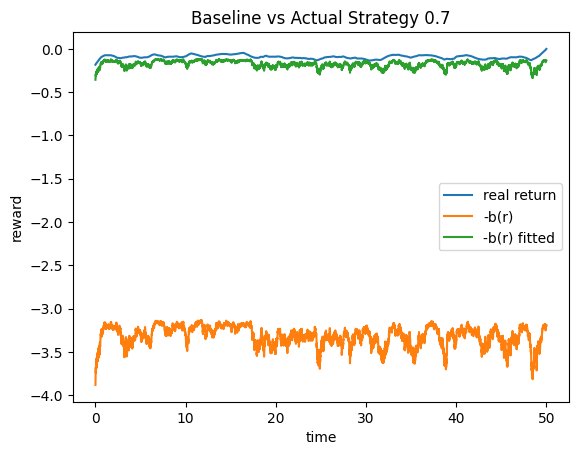

In [66]:
phi_val = 0.7
D = 0.25
r_d = np.sqrt(0.02*np.pi/D)
phi_aproximator = expected_baseline(phi_val,D,r_d,nu=0.25) 
avg_returns,seperation = compare_return_to_baseline(phi_val,phi_aproximator)

In [53]:
def fit(x,c1,c2):
    phi = 0.6
    D = 0.25
    r_d = np.sqrt(0.02*np.pi/D)
    nu=0.025
    first_term = (x**2/D)*np.log(x/r_d)
    second_term = (r_d**2*(phi-D))/(nu*(phi-2*D))
    return (c1*first_term + c2*second_term)

In [57]:
curve_fit(fit,seperation[:-1],-avg_returns[:-1])

(array([0.47851218, 0.00547239]),
 array([[5.27733567e-05, 2.42628191e-07],
        [2.42628191e-07, 1.17800607e-09]]))

In [56]:
seperation[:-1]

array([0.62486838, 0.62016086, 0.60737382, ..., 0.31800389, 0.31225744,
       0.30777817])

0.48222323


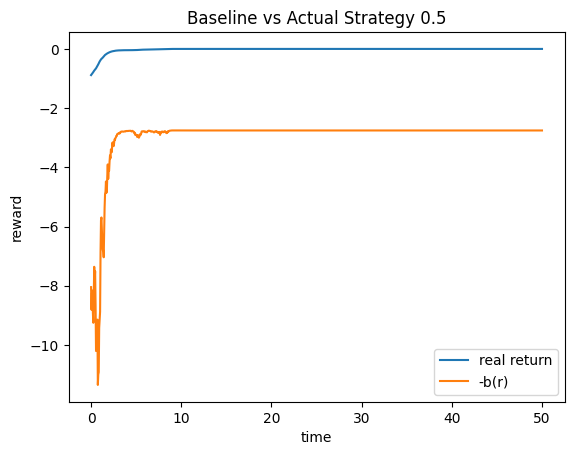

In [24]:
phi_val = 0.5
phi_aproximator = Physics_baseline(phi_val,0.25187,0.27710,3.,0.02*np.pi) 
compare_return_to_baseline(phi_val,phi_aproximator)

0.48222323


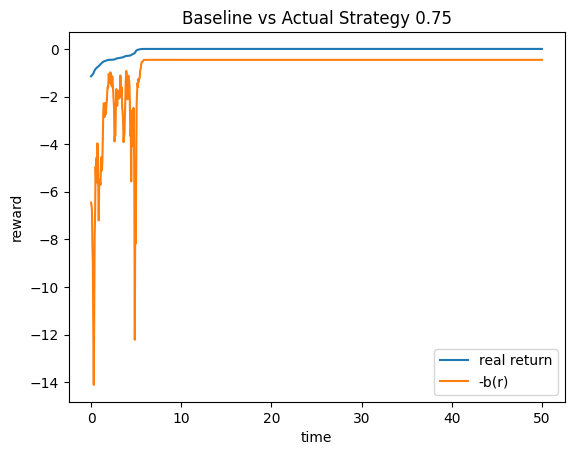

In [9]:
phi_val = 0.75
phi_aproximator = Physics_baseline(phi_val,0.25187,0.27710,3.,0.02*np.pi) 
compare_return_to_baseline(phi_val,phi_aproximator)

0.48222323


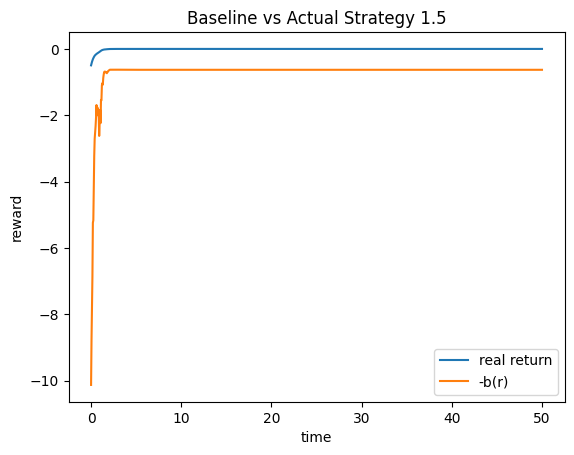

In [10]:
phi_val = 1.5
phi_aproximator = Physics_baseline(phi_val,0.25187,0.27710,3.,0.02*np.pi) 
compare_return_to_baseline(phi_val,phi_aproximator)

In [7]:
assert(1==0)

AssertionError: 

In [ ]:
for i in range(5,11):
    phi_val = i/10
    phi_aproximator = Physics_baseline(phi_val,0.25187,0.27710,5.,0.02*np.pi) 
    compare_return_to_baseline(phi_val,phi_aproximator)

In [ ]:
for i in range(5,11):
    phi_val = i/10
    print(phi_val)
    phi_agent = FixedPhi(phi_val)
    compare_return_to_baseline(phi_agent,f"phi={phi_agent.phi}",phi_aproximator)

In [ ]:
phi_val = 0.5
phi_aproximator = Physics_baseline(phi_val,0.18265,0.17904,5.) 
phi_agent = FixedPhi(1.1)
compare_return_to_baseline(phi_agent,f"phi={phi_agent.phi}",phi_aproximator)

In [ ]:
#compare_return_to_baseline(phi_agent,f"phi={phi_agent.phi}",phi_aproximator)
phi_val = 0.8
phi_aproximator = Physics_baseline(phi_val,0.16980,0.12038,10.) 
phi_agent = FixedPhi(1.0)
compare_return_to_baseline(phi_agent,"phi=1.0",phi_aproximator, time_horizon=10.)

In [ ]:
phi_aproximator.evaluate(np.array([0.02,0.018]))

In [ ]:
phi_aproximator.evaluate(0.018)

In [ ]:
x=np.array([[0.02,0.018],
        [1.,1.2]])
torch.linalg.norm(torch.tensor(x), axis=1)

In [ ]:
np.log(2.7)

In [14]:
a=np.random.random((2,2))
a

array([[0.03512617, 0.87718291],
       [0.48504639, 0.74221785]])

In [15]:
a.dot(np.array([1,0]))

array([0.03512617, 0.48504639])

In [60]:
for i in range(7,8):
    print(i)

7
